<a href="https://colab.research.google.com/github/AndresChavez123/Sys2025-2/blob/main/Parcial1_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASO 1: A=3.0, B=5.0, n=1, m=-1
  → Distancia numérica: 1.999500
  → Distancia teórica:  2.000000



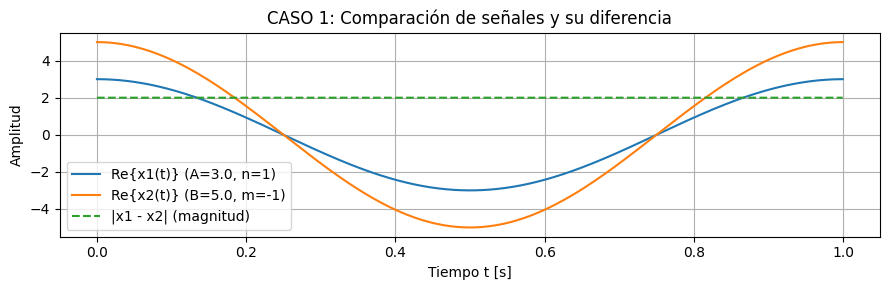

CASO 2: A=3.0, B=5.0, n=1, m=2
  → Distancia numérica: 5.830780
  → Distancia teórica:  5.830952



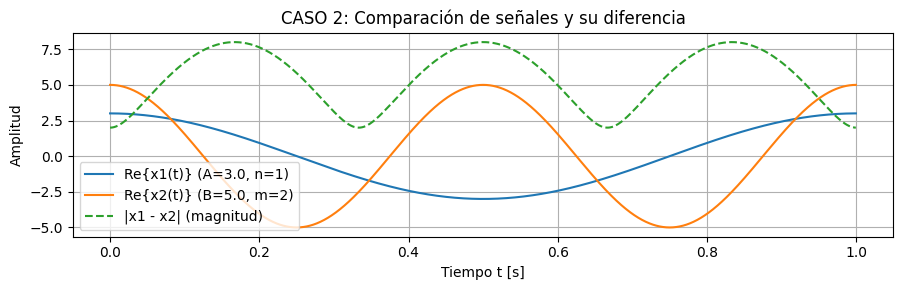

In [ ]:
# ===============================================================
#  DEMOSTRACIÓN TEÓRICO-NUMÉRICA DE LA DISTANCIA ENTRE EXPONENCIALES COMPLEJAS
# ===============================================================
# Este código compara la distancia teórica y la numérica entre dos señales
# complejas del tipo x(t) = A * e^(±j n ω₀ t).
# Se demuestra que:
#   - Si n = -m  →  d = |A - B|
#   - Si n ≠ -m →  d = √(A² + B²)
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# PARÁMETROS GENERALES
# ---------------------------------------------------------------
T = 1.0                     # Periodo de la señal (1 segundo para simplicidad)
omega0 = 2 * np.pi / T      # Frecuencia angular fundamental ω₀ = 2π/T

# ---------------------------------------------------------------
# DEFINICIÓN DE CASOS A PROBAR
# ---------------------------------------------------------------
cases = [
    {"A": 3.0, "B": 5.0, "n": 1, "m": -1},  # Caso 1: n = -m  → d = |A - B|
    {"A": 3.0, "B": 5.0, "n": 1, "m":  2},  # Caso 2: n ≠ -m → d = √(A² + B²)
]

# ---------------------------------------------------------------
# VECTOR DE TIEMPO
# ---------------------------------------------------------------
N = 2000                                # Número de muestras (resolución temporal)
t = np.linspace(0, T, N, endpoint=False) # Tiempo de 0 a T sin incluir el final

# ---------------------------------------------------------------
# BUCLE PRINCIPAL PARA AMBOS CASOS
# ---------------------------------------------------------------
for i, case in enumerate(cases, 1):
    # Extraer parámetros del caso actual
    A = case["A"]
    B = case["B"]
    n = case["n"]
    m = case["m"]

    # -----------------------------------------------------------
    # GENERACIÓN DE LAS SEÑALES COMPLEJAS
    # -----------------------------------------------------------
    # x1(t) = A * e^(-j n ω₀ t)
    # x2(t) = B * e^( j m ω₀ t)
    x1 = A * np.exp(-1j * n * omega0 * t)
    x2 = B * np.exp( 1j * m * omega0 * t)

    # -----------------------------------------------------------
    # CÁLCULO DE LA DISTANCIA NUMÉRICA (por integración)
    # -----------------------------------------------------------
    # Definición:  d² = (1/T) ∫ |x1(t) - x2(t)|² dt
    d2_num = (1.0 / T) * np.trapezoid(np.abs(x1 - x2)**2, t)
    d_num = np.sqrt(d2_num)

    # -----------------------------------------------------------
    # CÁLCULO DE LA DISTANCIA TEÓRICA (según el caso)
    # -----------------------------------------------------------
    if n == -m:
        # Caso especial: las frecuencias son opuestas
        d_teo = abs(A - B)
    else:
        # Caso general: las frecuencias son diferentes
        d_teo = np.sqrt(A**2 + B**2)

    # -----------------------------------------------------------
    # IMPRESIÓN DE RESULTADOS
    # -----------------------------------------------------------
    print(f"CASO {i}: A={A}, B={B}, n={n}, m={m}")
    print(f"  → Distancia numérica: {d_num:.6f}")
    print(f"  → Distancia teórica:  {d_teo:.6f}")
    print("")

    # -----------------------------------------------------------
    # VISUALIZACIÓN GRÁFICA
    # -----------------------------------------------------------
    plt.figure(figsize=(9,3))
    # Parte real de cada señal (para ver la forma de onda)
    plt.plot(t, x1.real, label=f"Re{{x1(t)}} (A={A}, n={n})")
    plt.plot(t, x2.real, label=f"Re{{x2(t)}} (B={B}, m={m})")
    # Diferencia entre ambas señales (magnitud)
    plt.plot(t, np.abs(x1 - x2), '--', label="|x1 - x2| (magnitud)")
    plt.title(f"CASO {i}: Comparación de señales y su diferencia")
    plt.xlabel("Tiempo t [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
